In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Populating the interactive namespace from numpy and matplotlib


# Load CSV file

In [3]:
data = pd.read_csv('Desktop/uber-raw-data-apr14.csv')

In [8]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


# Convert datetime and add some useful columns

In [5]:
type(data['Date/Time'])

pandas.core.series.Series

In [6]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [10]:
# create the function that returns the day of month
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [11]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [14]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis

# Analyze the DoM

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

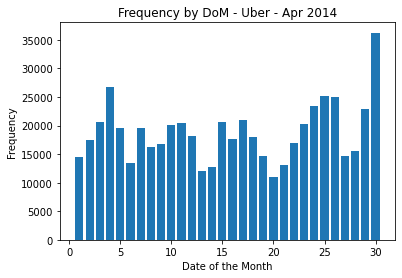

In [21]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('Date of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - Apr 2014')

In [30]:
by_date = data.groupby('dom').count()
by_date

KeyError: 'dom'

In [34]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)

by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

## Analyze the weekday

([<matplotlib.axis.XTick at 0x7fcc9026b2e0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

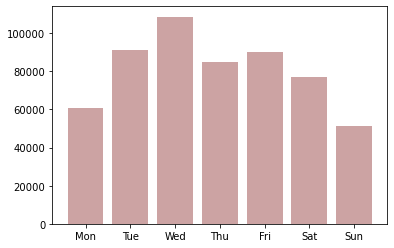

In [29]:
hist(data.weekday, bins=7, range=(-0.5,6.5), rwidth=.8, color='#AA6666', alpha=.6)
xticks(range(7), 'Mon,Tue,Wed,Thu,Fri,Sat,Sun'.split(','))

In [39]:
data_hm = data.groupby(['weekday', 'hour']).apply(count_rows).unstack()

In [40]:
data_hm

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

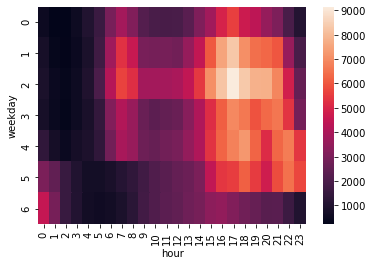

In [41]:
sns.heatmap(data_hm)

## by Lat and Lon

(40.7, 41.0)

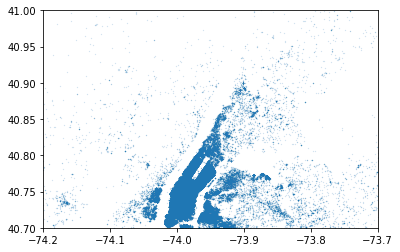

In [46]:
plot(data['Lon'], data['Lat'], '.', ms=.3, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)